## 문제 1

In [16]:
# 필요한 라이브러리 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier # 결정트리

import pandas as pd
import matplotlib.pyplot as plt
import numtpy as np

ModuleNotFoundError: No module named 'numtpy'

In [3]:
# 데이터 정보확인
# sepal length in cm - 꽃받침길이
# sepal width in cm  - 꽃받침너비
# petal length in cm - 꽃잎 길이
# petal width in cm  - 꽃잎 너비
iris_data = load_iris()
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [6]:
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y =pd.DataFrame(iris_data.target, columns=['class'])
y

,class
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [10]:
# 결정트리모델 생성
# 결정트리 깊이 설정 (max_depth=4)
model = DecisionTreeClassifier(max_depth=4)

In [11]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [12]:
model.predict(X_test)

array([1, 2, 2, 0, 2, 2, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

In [13]:
model.score(X_test,y_test) # 90프로 확률로 분류가능

0.9

In [17]:
# 속성들의 중요도
importances = model.feature_importances_

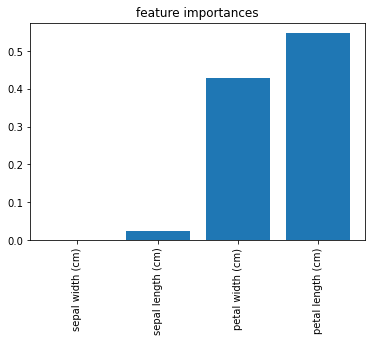

In [21]:
# 중요도 시각화
indices_sorted = np.argsort(importances) # 중요도 낮은 순서대로의 인덱스

plt.figure()
plt.title("feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()

## 문제2
- 결정트리로 악성/양성 유방암 분류하기

In [26]:
from sklearn.datasets import load_breast_cancer

 암은 사람한테 치명적인 악성(malignant)과 그렇지 않은 양성(benign)암으로 나뉩니다. sklearn 유방암 데이터 셋은 유방암세포들의 다양한 속성들과 (길이, 넓이, 둘레 등등) 암이 악성인지 양성인지를 저장하고 있습니다.

In [27]:
# 데이터 셋 불러 오기
cancer_data = load_breast_cancer()
# 데이터 셋을 살펴보기 위한 코드
print(cancer_data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

- 데이터 셋은 load_breast_cancer 함수를 호출해서 cancer_data 변수에 저장했습니다.
- 속성들은 cancer_data.data에, 악성인지 양성인지는 cancer_data.target에 저장돼있습니다.
- 속성 이름은 cancer_data.feature_names에 저장돼있고, 목표 변수 열 이름은 "class"로 지어주세요.

In [28]:
X = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
y = pd.DataFrame(cancer_data.target, columns = ['class'])

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)
y_train = y_train.values.ravel() 

# 실행 코드
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
306,13.20,15.82,84.07,537.3,0.08511,0.05251,0.001461,0.003261,0.1632,0.05894,...,14.41,20.45,92.00,636.9,0.11280,0.1346,0.0112,0.02500,0.2651,0.08385
410,11.36,17.57,72.49,399.8,0.08858,0.05313,0.027830,0.021000,0.1601,0.05913,...,13.05,36.32,85.07,521.3,0.14530,0.1622,0.1811,0.08698,0.2973,0.07745
197,18.08,21.84,117.40,1024.0,0.07371,0.08642,0.110300,0.057780,0.1770,0.05340,...,19.76,24.70,129.10,1228.0,0.08822,0.1963,0.2535,0.09181,0.2369,0.06558
376,10.57,20.22,70.15,338.3,0.09073,0.16600,0.228000,0.059410,0.2188,0.08450,...,10.85,22.82,76.51,351.9,0.11430,0.3619,0.6030,0.14650,0.2597,0.12000
244,19.40,23.50,129.10,1155.0,0.10270,0.15580,0.204900,0.088860,0.1978,0.06000,...,21.65,30.53,144.90,1417.0,0.14630,0.2968,0.3458,0.15640,0.2920,0.07614


y_train = y_train.values.ravel() 나중에 모델을 학습시킬 때 나올 수 있는 경고 메시지가 나오지 않게 하기 위해서 추가

In [31]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [32]:
predictions = model.predict(X_test)

In [33]:
score = model.score(X_test,y_test)

In [35]:
print(predictions, score)

[0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0
 1 1 0 1 1 1 0 1 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1
 0 0 1] 0.9473684210526315


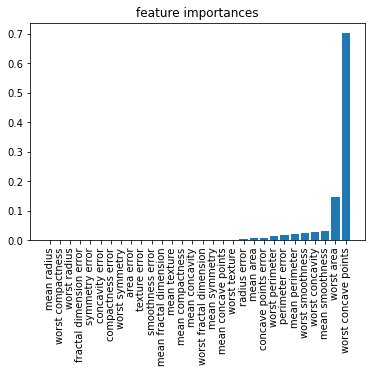

In [36]:
# 속성들의 중요도
importances = model.feature_importances_
# 중요도 시각화
indices_sorted = np.argsort(importances) # 중요도 낮은 순서대로의 인덱스

plt.figure()
plt.title("feature importances")
plt.bar(range(len(importances)), importances[indices_sorted])
plt.xticks(range(len(importances)), X.columns[indices_sorted], rotation=90)
plt.show()